# Imports and Prelims

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preliminary Data Analysis

## EUR/USD Data

* Date: The date of the data point.
* Time: The hour of the data point.
* BO: Bid Open, the opening bid price.
* BH: Bid High, the highest bid price during the hour.
* BL: Bid Low, the lowest bid price during the hour.
* BC: Bid Close, the closing bid price.
* BCh: Bid Change, the change in the bid price from open to close.
* AO: Ask Open, the opening ask price.
* AH: Ask High, the highest ask price during the hour.
* AL: Ask Low, the lowest ask price during the hour.
* AC: Ask Close, the closing ask price.
* ACh: Ask Change, the change in the ask price from open to close.

### Preprocessing

In [2]:
forex_data = pd.read_csv("/home/kyrem1/Finance/projects/forex/data/eurusd_minute.csv")
# Parse the 'Date' and 'Time' columns into a single datetime column
forex_data['DateTime'] = pd.to_datetime(forex_data['Date'] + ' ' + forex_data['Time'])
forex_data.head()

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh,DateTime
0,2005-01-02,18:29,1.3555,1.3555,1.3555,1.3555,0.0,1.3565,1.3565,1.3565,1.3565,0.0,2005-01-02 18:29:00
1,2005-01-02,18:38,1.3555,1.3555,1.3555,1.3555,0.0,1.3565,1.3565,1.3565,1.3565,0.0,2005-01-02 18:38:00
2,2005-01-02,18:51,1.3562,1.3562,1.3562,1.3562,0.0,1.3572,1.3572,1.3572,1.3572,0.0,2005-01-02 18:51:00
3,2005-01-02,18:52,1.3560,1.3560,1.3560,1.3560,0.0,1.3570,1.3570,1.3570,1.3570,0.0,2005-01-02 18:52:00
4,2005-01-02,18:55,1.3563,1.3563,1.3563,1.3563,0.0,1.3573,1.3573,1.3573,1.3573,0.0,2005-01-02 18:55:00


### Data Viz

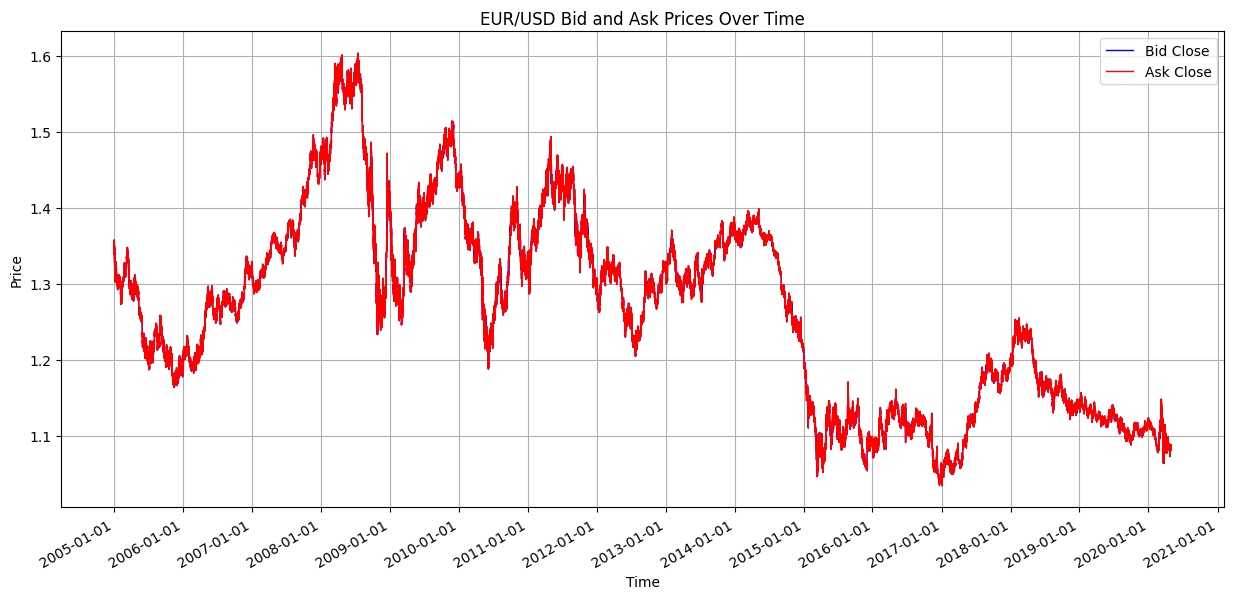

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Plotting
plt.figure(figsize=(15, 7))

# Plot Bid and Ask prices
plt.plot(forex_data['DateTime'], forex_data['BC'], label='Bid Close', color='blue', linewidth=1)

# Formatting the plot
plt.title('EUR/USD Bid and Ask Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rotation

plt.show()


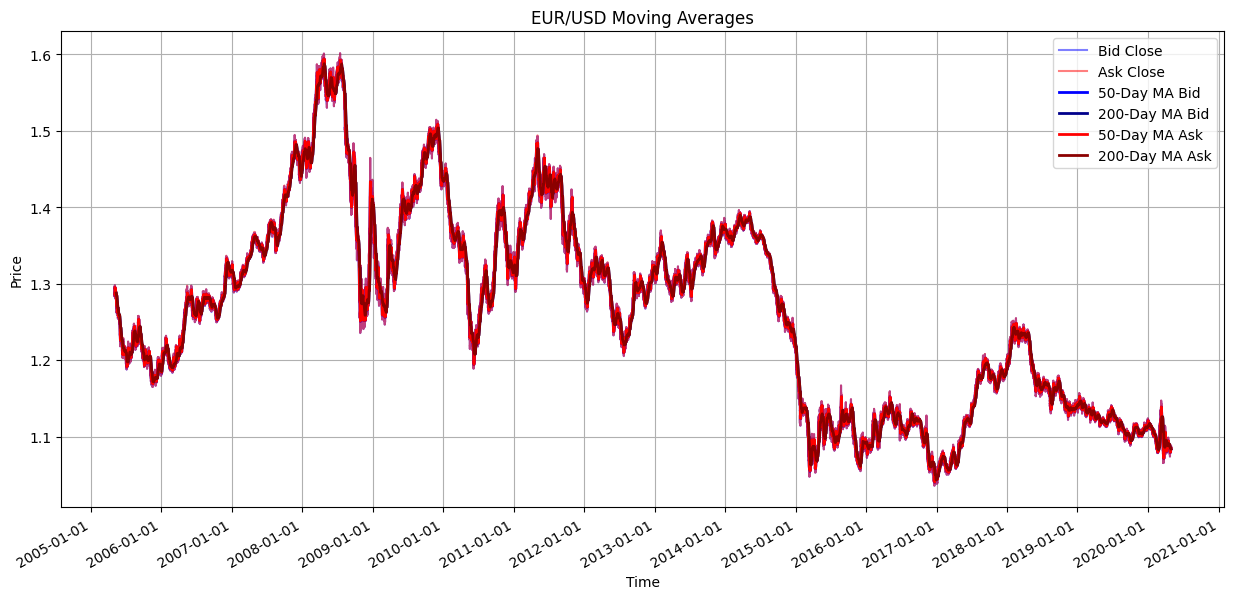

In [8]:
# Calculate moving averages
data['50D_MA_Bid'] = data['BC'].rolling(window=50).mean()
data['200D_MA_Bid'] = data['BC'].rolling(window=200).mean()
data['50D_MA_Ask'] = data['AC'].rolling(window=50).mean()
data['200D_MA_Ask'] = data['AC'].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(15, 7))

# Plot original Bid and Ask prices
plt.plot(data['DateTime'], data['BC'], label='Bid Close', color='blue', alpha=0.5)
plt.plot(data['DateTime'], data['AC'], label='Ask Close', color='red', alpha=0.5)

# Plot moving averages
plt.plot(data['DateTime'], data['50D_MA_Bid'], label='50-Day MA Bid', color='blue', linewidth=2)
plt.plot(data['DateTime'], data['200D_MA_Bid'], label='200-Day MA Bid', color='darkblue', linewidth=2)
plt.plot(data['DateTime'], data['50D_MA_Ask'], label='50-Day MA Ask', color='red', linewidth=2)
plt.plot(data['DateTime'], data['200D_MA_Ask'], label='200-Day MA Ask', color='darkred', linewidth=2)

# Formatting the plot
plt.title('EUR/USD Moving Averages')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rotation

plt.show()


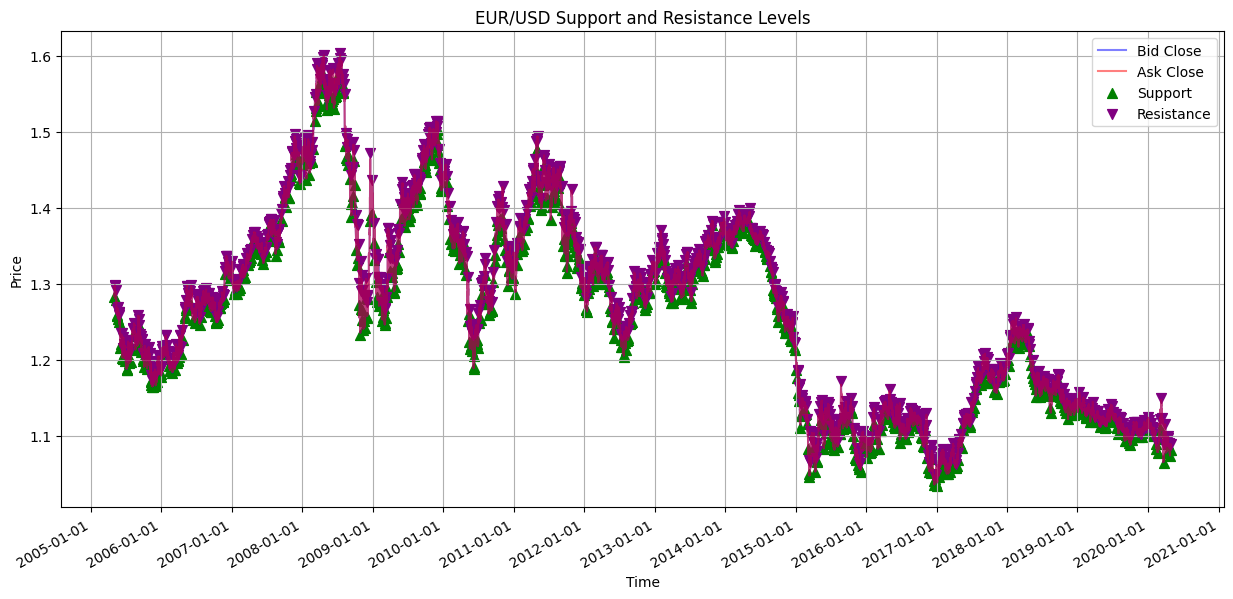

In [9]:
import numpy as np

# Function to find support and resistance levels
def find_levels(data, window=50):
    """
    A simple method to identify potential support and resistance levels based on local minima and maxima within a specified window.
    """
    minima = data['Low'].rolling(window=window, center=True).min()
    maxima = data['High'].rolling(window=window, center=True).max()

    support_levels = data[data['Low'] == minima]
    resistance_levels = data[data['High'] == maxima]

    return support_levels, resistance_levels

# Calculate high and low for support and resistance levels
data['High'] = data[['BH', 'AH']].max(axis=1)
data['Low'] = data[['BL', 'AL']].min(axis=1)

# Find potential support and resistance levels
support_levels, resistance_levels = find_levels(data)

# Plotting
plt.figure(figsize=(15, 7))

# Plot Bid and Ask prices
plt.plot(data['DateTime'], data['BC'], label='Bid Close', color='blue', alpha=0.5)
plt.plot(data['DateTime'], data['AC'], label='Ask Close', color='red', alpha=0.5)

# Plot support and resistance levels
plt.scatter(support_levels['DateTime'], support_levels['Low'], color='green', label='Support', marker='^', s=50)
plt.scatter(resistance_levels['DateTime'], resistance_levels['High'], color='purple', label='Resistance', marker='v', s=50)

# Formatting the plot
plt.title('EUR/USD Support and Resistance Levels')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rotation

plt.show()


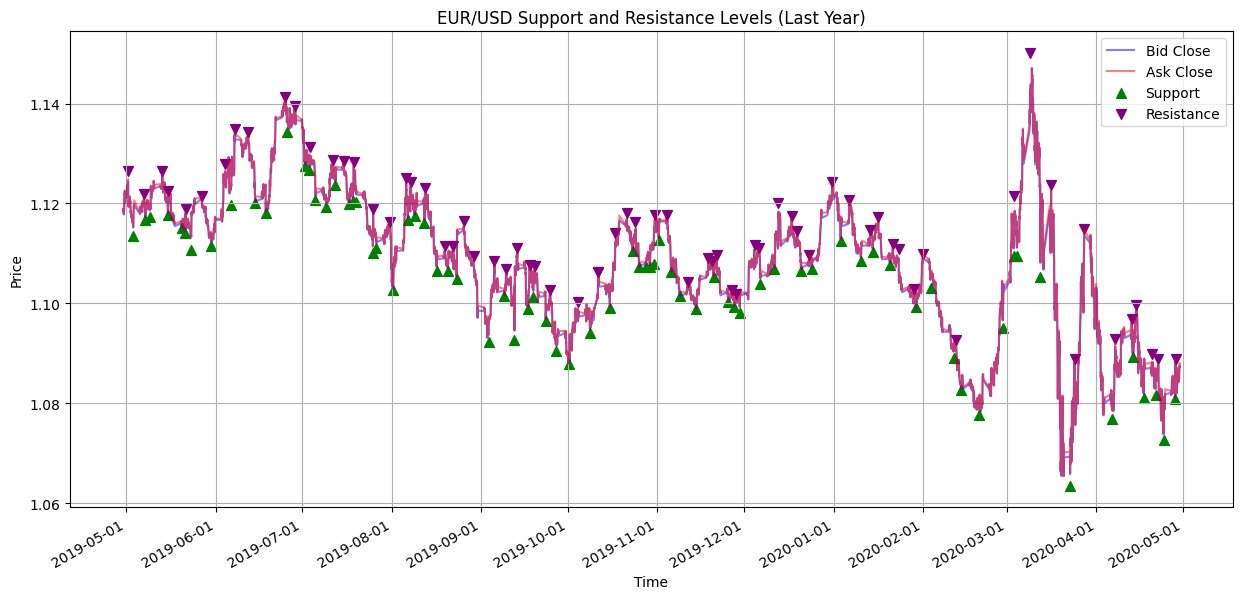

In [10]:
# Assuming the data is sorted by date, we'll zoom into the last year of the data
zoomed_data = data[data['DateTime'] >= data['DateTime'].max() - pd.DateOffset(years=1)]

# Find potential support and resistance levels for the zoomed data
zoomed_support_levels, zoomed_resistance_levels = find_levels(zoomed_data)

# Plotting
plt.figure(figsize=(15, 7))

# Plot Bid and Ask prices for the zoomed data
plt.plot(zoomed_data['DateTime'], zoomed_data['BC'], label='Bid Close', color='blue', alpha=0.5)
plt.plot(zoomed_data['DateTime'], zoomed_data['AC'], label='Ask Close', color='red', alpha=0.5)

# Plot support and resistance levels for the zoomed data
plt.scatter(zoomed_support_levels['DateTime'], zoomed_support_levels['Low'], color='green', label='Support', marker='^', s=50)
plt.scatter(zoomed_resistance_levels['DateTime'], zoomed_resistance_levels['High'], color='purple', label='Resistance', marker='v', s=50)

# Formatting the plot
plt.title('EUR/USD Support and Resistance Levels (Last Year)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotation

plt.show()


## News Data

### Preprocessing

In [3]:
news_data = pd.read_csv("/home/kyrem1/Finance/projects/forex/data/eurusd_news.csv")

In [4]:
news_data

,Unnamed: 0,Date,Title,Article
0,0,2019-01-18,Forex - U.S. Dollar Rises as Consumer Optimism...,© Reuters.\nInvesting.com - The greenback pick...
1,1,2019-01-18,Forex - Upbeat U.S. Data Can't Help Dollar as ...,© Reuters.\nInvesting.com – The U.S. dollar li...
2,2,2019-01-17,Forex - U.S. Dollar Remains Steady as Jobless ...,© Reuters.\nInvesting.com - The greenback was ...
3,3,2019-01-17,Forex - Dollar Pushes Higher; Pound Slips as R...,© Reuters.\nInvesting.com - The U.S. dollar pu...
4,4,2019-01-17,World stocks rise; sterling up ahead of May vote,© Reuters. A trader works on the floor at the ...
...,...,...,...,...
1128,1128,2018-01-02,Forex - Dollar Remains at 3-Month Lows in Quie...,Dollar still broadly lower as traders return t...
1129,1129,2018-01-02,Forex - Weaker Dollar Hits Fresh 3-Month Lows,© Reuters. Weaker dollar hits fresh 3-month lo...
1130,1130,2018-01-01,Forex - Aussie Gains In Asia After Caixin Manu...,Aussie gains in Asia\nInvesting.com - The Auss...
1131,1131,2018-01-01,Forex - Dollar Steady In Early Asia Ahead OF C...,Dollar steady in Asia\nInvesting.com - The dol...


### VADER Sentiment Analysis

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Combine the Title and Article columns into one
news_data['Combined_Text'] = news_data['Title'] + ' ' + news_data['Article']

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to apply sentiment analysis
def apply_sentiment_analysis(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to the combined text
news_data['Combined_Sentiment'] = news_data['Combined_Text'].apply(apply_sentiment_analysis)

# Extract compound scores for analysis
news_data['Combined_Compound'] = news_data['Combined_Sentiment'].apply(lambda score: score['compound'])

# Now news_data has the sentiment scores for the combined title and article texts


#### VADER Viz

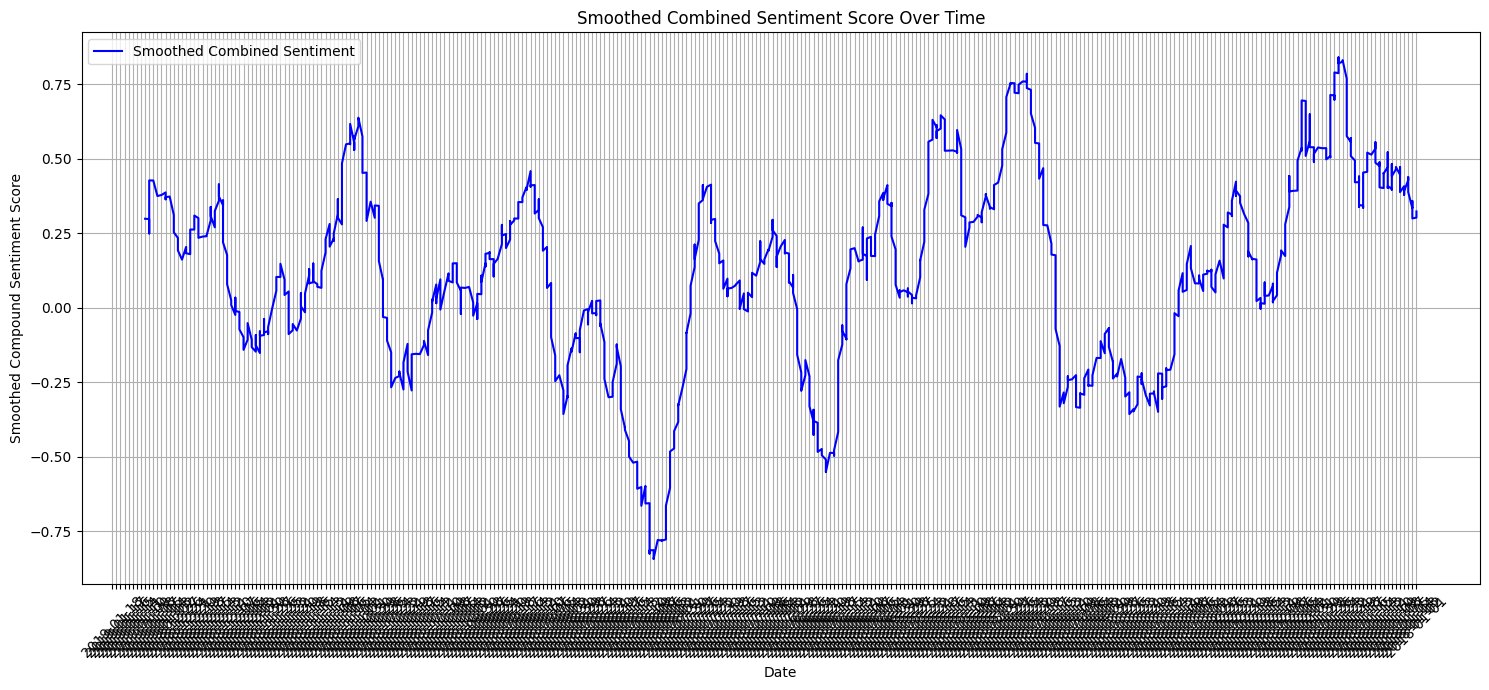

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate a moving average of the combined compound sentiment scores
window_size = 30  # Define the window size for smoothing
news_data['Smoothed_Combined_Compound'] = news_data['Combined_Compound'].rolling(window=window_size).mean()

# Plot the smoothed sentiment scores
plt.figure(figsize=(15, 7))
plt.plot(news_data['Date'], news_data['Smoothed_Combined_Compound'], label='Smoothed Combined Sentiment', color='blue')
plt.title('Smoothed Combined Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Smoothed Compound Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# # Initialize the VADER sentiment intensity analyzer
# analyzer = SentimentIntensityAnalyzer()

# # Function to apply sentiment analysis
# def apply_sentiment_analysis(text):
#     return analyzer.polarity_scores(text)

# # Apply sentiment analysis to the Title and Article columns
# news_data['Title_Sentiment'] = news_data['Title'].apply(lambda title: apply_sentiment_analysis(title))
# news_data['Article_Sentiment'] = news_data['Article'].apply(lambda text: apply_sentiment_analysis(text))

# # Extract compound scores for graphical comparison
# news_data['Title_Compound'] = news_data['Title_Sentiment'].apply(lambda score: score['compound'])
# news_data['Article_Compound'] = news_data['Article_Sentiment'].apply(lambda score: score['compound'])

# news_data[['Title_Compound', 'Article_Compound']].head()


In [8]:
# import matplotlib.pyplot as plt

# # Assuming news_data is your DataFrame with the sentiment scores
# dates = news_data['Date']  # Extracting the dates from your DataFrame
# title_compound_scores = news_data['Title_Compound']  # Title compound sentiment scores
# article_compound_scores = news_data['Article_Compound']  # Article compound sentiment scores

# plt.figure(figsize=(15, 7))

# # Plot title sentiment scores
# plt.plot(dates, title_compound_scores, label='Title Sentiment', color='blue')

# # Plot article sentiment scores
# plt.plot(dates, article_compound_scores, label='Article Sentiment', color='red')

# # Formatting the plot
# plt.title('Comparison of Sentiment Scores: Titles vs. Articles')
# plt.xlabel('Date')
# plt.ylabel('Compound Sentiment Score')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()


In [9]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming news_data is your DataFrame with the sentiment scores
# dates = pd.to_datetime(news_data['Date'])  # Ensure dates are in datetime format
# title_compound_scores = news_data['Title_Compound']  # Title compound sentiment scores
# article_compound_scores = news_data['Article_Compound']  # Article compound sentiment scores

# # Calculate moving average for smoothing (e.g., over a 7-day window)
# window_size = 7
# title_ma = title_compound_scores.rolling(window=window_size).mean()
# article_ma = article_compound_scores.rolling(window=window_size).mean()

# plt.figure(figsize=(15, 7))

# # Plot smoothed sentiment scores
# plt.plot(dates, title_ma, label='Title Sentiment (Smoothed)', color='blue')
# plt.plot(dates, article_ma, label='Article Sentiment (Smoothed)', color='red')

# # Formatting the plot
# plt.title('Comparison of Sentiment Scores: Titles vs. Articles (Smoothed)')
# plt.xlabel('Date')
# plt.ylabel('Compound Sentiment Score (Smoothed)')
# plt.legend()
# plt.grid(True)

# # Improve the date labels to prevent overlap
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the number of date labels

# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()


#### VADER vs. Forex Viz

In [10]:
# Identify the date range of the news data
news_start_date = news_data['Date'].min()
news_end_date = news_data['Date'].max()

# Convert date columns to datetime if they are not already
forex_data['Date'] = pd.to_datetime(forex_data['Date'])
news_data['Date'] = pd.to_datetime(news_data['Date'])

# Filter the forex data to the date range of the news data
filtered_forex_data = forex_data[(forex_data['Date'] >= news_start_date) & (forex_data['Date'] <= news_end_date)]

# Proceed with plotting or analysis using filtered_forex_data


/tmp/ipykernel_2797/91191872.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_forex_data['Smoothed_BC'] = filtered_forex_data['BC'].rolling(window=30).mean()


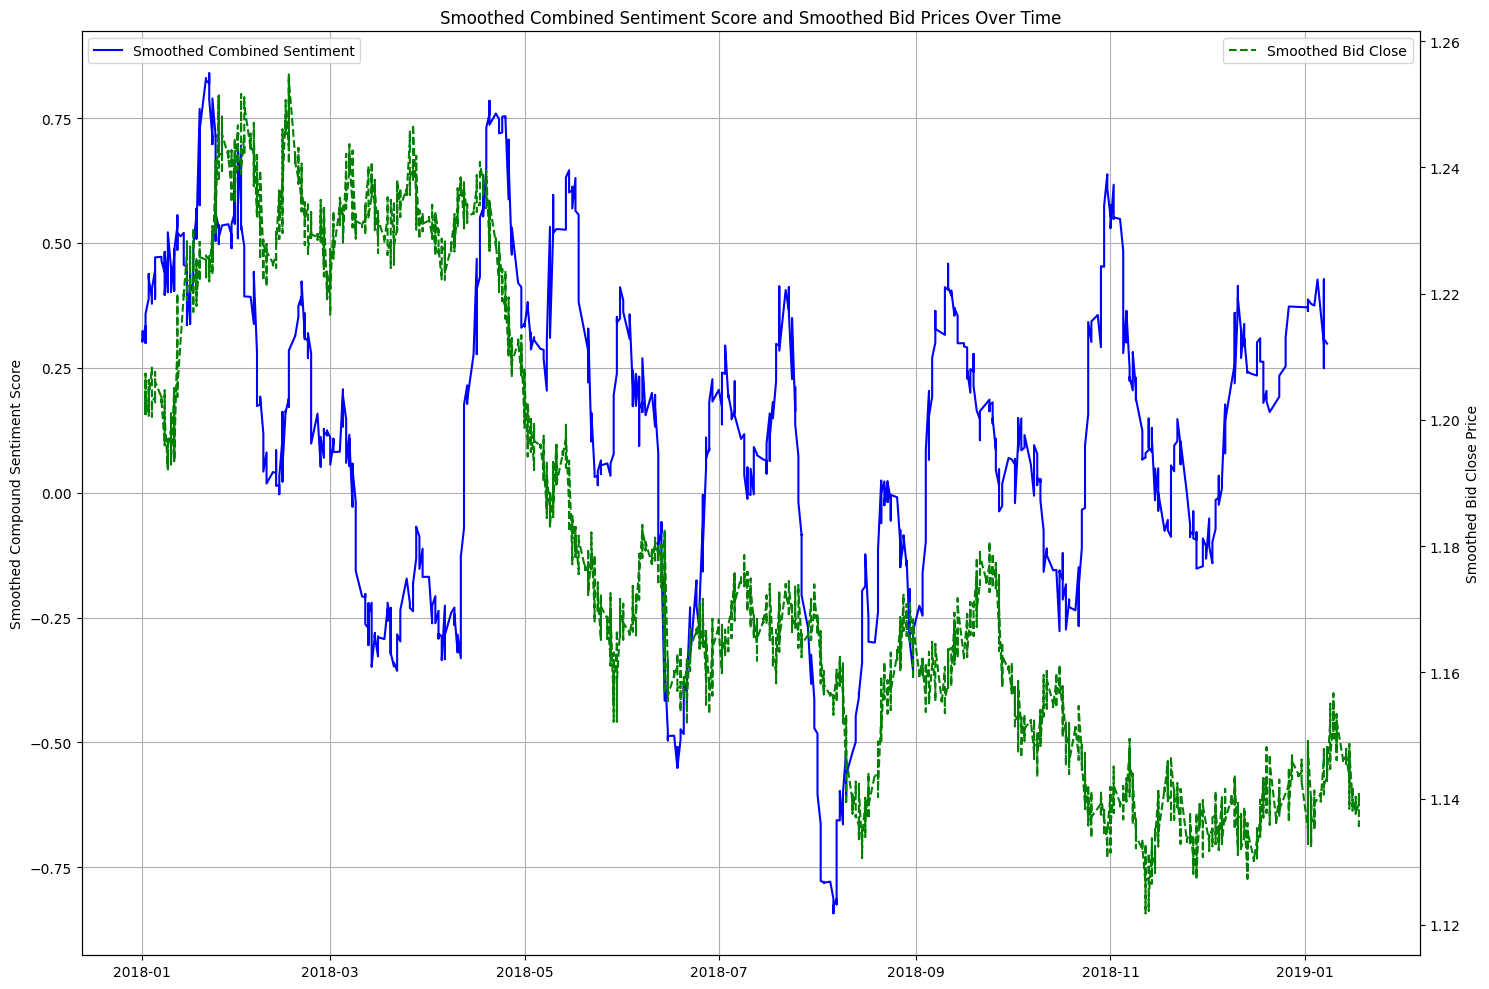

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the moving average for the combined sentiment scores
news_data['Smoothed_Combined_Compound'] = news_data['Combined_Compound'].rolling(window=30).mean()

# Calculate the moving average for the forex bid prices
filtered_forex_data['Smoothed_BC'] = filtered_forex_data['BC'].rolling(window=30).mean()

# Ensure both datasets are sorted by date if not already
news_data = news_data.sort_values('Date')
filtered_forex_data = filtered_forex_data.sort_values('Date')

# Plotting
plt.figure(figsize=(15, 10))

# Plot the smoothed sentiment scores
plt.plot(news_data['Date'], news_data['Smoothed_Combined_Compound'], label='Smoothed Combined Sentiment', color='blue')
plt.ylabel('Smoothed Compound Sentiment Score')
plt.legend(loc='upper left')
plt.grid(True)

# Create a secondary y-axis for the smoothed bid prices
ax2 = plt.gca().twinx()
ax2.plot(filtered_forex_data['Date'], filtered_forex_data['Smoothed_BC'], label='Smoothed Bid Close', color='green', linestyle='--')
ax2.set_ylabel('Smoothed Bid Close Price')
ax2.legend(loc='upper right')

plt.title('Smoothed Combined Sentiment Score and Smoothed Bid Prices Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [12]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming news_data and forex_data are your DataFrames
# dates = pd.to_datetime(news_data['Date'])  # Ensure dates are in datetime format for the sentiment data
# forex_dates = pd.to_datetime(filtered_forex_data['Date'])  # Ensure dates are in datetime format for the forex data

# # Sentiment scores
# title_ma = news_data['Title_Compound'].rolling(window=7).mean()
# article_ma = news_data['Article_Compound'].rolling(window=7).mean()

# # Forex prices
# bid_prices = filtered_forex_data['BC']  # Assuming 'BC' is Bid Close
# ask_prices = filtered_forex_data['AC']  # Assuming 'AC' is Ask Close

# plt.figure(figsize=(15, 10))

# # First plot: Sentiment scores
# plt.plot(dates, title_ma, label='Title Sentiment (Smoothed)', color='blue')
# plt.plot(dates, article_ma, label='Article Sentiment (Smoothed)', color='red')
# plt.ylabel('Compound Sentiment Score (Smoothed)')
# plt.legend(loc='upper left')
# plt.grid(True)

# # Create secondary y-axis for forex prices
# ax2 = plt.gca().twinx()
# ax2.plot(forex_dates, bid_prices, label='Bid Close', color='green', linestyle='--')
# ax2.plot(forex_dates, ask_prices, label='Ask Close', color='purple', linestyle='--')
# ax2.set_ylabel('Forex Price')

# # Adding legend for the second axis
# ax2.legend(loc='upper right')

# plt.title('Sentiment Scores and Forex Prices')
# plt.xlabel('Date')

# # Improve the date labels to prevent overlap
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the number of date labels

# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()


In [13]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming news_data and filtered_forex_data are your DataFrames
# # Convert 'Date' to datetime if not already
# news_data['Date'] = pd.to_datetime(news_data['Date'])
# filtered_forex_data['Date'] = pd.to_datetime(filtered_forex_data['Date'])

# # Apply a moving average for smoothing
# window_size = 30  # Adjust this for more or less smoothing
# title_ma = news_data['Title_Compound'].rolling(window=window_size).mean()
# article_ma = news_data['Article_Compound'].rolling(window=window_size).mean()
# bid_ma = filtered_forex_data['BC'].rolling(window=window_size).mean()
# ask_ma = filtered_forex_data['AC'].rolling(window=window_size).mean()

# plt.figure(figsize=(15, 10))

# # First plot: Sentiment scores (smoothed)
# plt.plot(news_data['Date'], title_ma, label='Title Sentiment', color='blue', alpha=0.7)
# plt.plot(news_data['Date'], article_ma, label='Article Sentiment', color='red', alpha=0.7)
# plt.ylabel('Sentiment Score (Smoothed)')
# plt.legend(loc='upper left')
# plt.grid(True)

# # Secondary y-axis for forex prices (smoothed)
# ax2 = plt.gca().twinx()
# ax2.plot(filtered_forex_data['Date'], bid_ma, label='Bid Close', color='green', linestyle='--', alpha=0.7)
# ax2.plot(filtered_forex_data['Date'], ask_ma, label='Ask Close', color='purple', linestyle='--', alpha=0.7)
# ax2.set_ylabel('Forex Price (Smoothed)')
# ax2.legend(loc='upper right')

# plt.title('Smoothed Sentiment Scores and Forex Prices')
# plt.xlabel('Date')

# # Improve the date labels to prevent overlap
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()


# Data Preprocessing

In [14]:
# Feature Engineering: Combine sentiment and forex data
# Assuming the date column in both datasets is already in datetime format and named 'Date'

# Aggregate sentiment scores by date, taking the average if there are multiple entries per day
daily_sentiment = news_data.groupby('Date')['Combined_Compound'].mean().reset_index()

# Merge the forex data with the aggregated sentiment data on the date
combined_data = pd.merge(filtered_forex_data, daily_sentiment, on='Date', how='left')

# Fill any missing sentiment values with the mean sentiment
combined_data['Title_Compound'] = combined_data['Combined_Compound'].fillna(combined_data['Combined_Compound'].mean())

# Label Creation
# Define buy, sell, and hold based on the percentage change of the bid close price
# For example, thresholds for buy > 0.5%, sell < -0.5%, else hold
combined_data['Price_Change'] = combined_data['BC'].pct_change()
combined_data['Label'] = pd.cut(combined_data['Price_Change'], bins=[-float('inf'), -0.005, 0.005, float('inf')], labels=['Sell', 'Hold', 'Buy'])

# Drop the first row as it will have a NaN value for the percentage change
combined_data = combined_data.dropna(subset=['Label'])

# Check the combined data
combined_data[['Date', 'BC', 'Combined_Compound', 'Price_Change', 'Label']].head()


,Date,BC,Combined_Compound,Price_Change,Label
1,2018-01-02,1.20350,-0.37602,0.002165,Hold
2,2018-01-02,1.20324,-0.37602,-0.000216,Hold
3,2018-01-02,1.20350,-0.37602,0.000216,Hold
4,2018-01-02,1.20327,-0.37602,-0.000191,Hold
5,2018-01-02,1.20324,-0.37602,-0.000025,Hold


In [15]:
# Ensure 'Title_Compound' exists in news_data or use the correct column name
if 'Combined_Compound' not in news_data.columns:
    # Replace 'Title_Compound' with the actual column name that contains sentiment scores
    sentiment_column = 'YourSentimentColumnName'  # Change this to your actual column name
else:
    sentiment_column = 'Combined_Compound'

# Aggregate sentiment scores by date
daily_sentiment = news_data.groupby('Date')[sentiment_column].mean().reset_index()

# Merge the forex data with the aggregated sentiment data on the date
combined_data = pd.merge(filtered_forex_data, daily_sentiment, on='Date', how='left')

# Fill any missing sentiment values with the mean sentiment
combined_data[sentiment_column] = combined_data[sentiment_column].fillna(combined_data[sentiment_column].mean())

# Define buy, sell, and hold based on the percentage change of the bid close price
combined_data['Price_Change'] = combined_data['BC'].pct_change()
combined_data['Label'] = pd.cut(combined_data['Price_Change'], bins=[-float('inf'), -0.005, 0.005, float('inf')], labels=['Sell', 'Hold', 'Buy'])

# Drop the first row as it will have a NaN value for the percentage change
combined_data = combined_data.dropna(subset=['Label'])

# Proceed with the model training and testing using 'combined_data'


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Feature Engineering
# Assuming 'bid_close' and 'sentiment_score' are in your dataset
# You might need to merge datasets or create new features as needed

# Step 2: Labeling the Data
# Example of labeling based on bid close price change
def label_data(row, threshold=0.0001):
    if row['price_change'] > threshold:
        return 'buy'
    elif row['price_change'] < -threshold:
        return 'sell'
    else:
        return 'hold'

combined_data['price_change'] = combined_data['BC'].pct_change()  # percentage change in price
combined_data['label'] = combined_data.apply(label_data, axis=1)

# Step 3: Data Preprocessing
features = combined_data[['BC', 'Combined_Compound']]  # Example feature columns
labels = combined_data['label']

# Handling missing values, scaling, etc.
features.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 4: Model Selection and Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


/tmp/ipykernel_2797/339644144.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values
/tmp/ipykernel_2797/339644144.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values


              precision    recall  f1-score   support

         buy       0.27      0.21      0.24     16295
        hold       0.61      0.71      0.65     43686
        sell       0.27      0.21      0.24     16463

    accuracy                           0.49     76444
   macro avg       0.38      0.38      0.38     76444
weighted avg       0.46      0.49      0.48     76444



In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Assuming combined_data is your preprocessed dataset with features and 'Label' column
features = combined_data[['BC', 'Combined_Compound']]  # Select relevant feature columns
labels = combined_data['Label']

# Preprocess the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Encode the labels
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
# Convert labels to one-hot encoding
dummy_labels = to_categorical(encoded_labels)

# Split the data into training and testing sets
train_samples = int(0.8 * len(features_scaled))
X_train, X_test = features_scaled[:train_samples], features_scaled[train_samples:]
y_train, y_test = dummy_labels[:train_samples], dummy_labels[train_samples:]

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output neurons for 'buy', 'sell', 'hold'

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=10)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


Epoch 1/5


/home/kyrem1/Development/pydev/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30578/30578 ━━━━━━━━━━━━━━━━━━━━ 19s 606us/step - accuracy: 0.9988 - loss: 0.0187
Epoch 2/5
30578/30578 ━━━━━━━━━━━━━━━━━━━━ 18s 604us/step - accuracy: 0.9988 - loss: 0.0107
Epoch 3/5
30578/30578 ━━━━━━━━━━━━━━━━━━━━ 18s 601us/step - accuracy: 0.9988 - loss: 0.0108
Epoch 4/5
30578/30578 ━━━━━━━━━━━━━━━━━━━━ 22s 712us/step - accuracy: 0.9988 - loss: 0.0104
Epoch 5/5
30578/30578 ━━━━━━━━━━━━━━━━━━━━ 24s 774us/step - accuracy: 0.9988 - loss: 0.0100
2389/2389 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - accuracy: 0.9988 - loss: 0.0105
Test Accuracy: 0.9986264705657959


In [22]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assuming combined_data is your dataset sorted by date with features and target labels
mid_point = len(combined_data) // 2
first_half = combined_data.iloc[:mid_point]
second_half = combined_data.iloc[mid_point:]

# Prepare features and labels
features = ['BC', 'Combined_Compound']  # example feature columns
X = first_half[features]
y = first_half['Label']

# Encoding categorical data
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the first half into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=10, validation_data=(X_test, y_test))

# Prepare the second half of the data for evaluation
X_eval = second_half[features]
y_eval = second_half['Label']
X_eval_scaled = scaler.transform(X_eval)
y_eval_encoded = encoder.transform(y_eval)
y_eval_categorical = to_categorical(y_eval_encoded)

# Evaluate the model on the second half
eval_loss, eval_accuracy = model.evaluate(X_eval_scaled, y_eval_categorical)
print(f'Evaluation loss: {eval_loss}, Evaluation accuracy: {eval_accuracy}')


Epoch 1/5


/home/kyrem1/Development/pydev/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15289/15289 ━━━━━━━━━━━━━━━━━━━━ 12s 714us/step - accuracy: 0.9960 - loss: 0.0288 - val_accuracy: 0.9986 - val_loss: 0.0125
Epoch 2/5
15289/15289 ━━━━━━━━━━━━━━━━━━━━ 11s 711us/step - accuracy: 0.9987 - loss: 0.0112 - val_accuracy: 0.9986 - val_loss: 0.0123
Epoch 3/5
15289/15289 ━━━━━━━━━━━━━━━━━━━━ 11s 708us/step - accuracy: 0.9987 - loss: 0.0116 - val_accuracy: 0.9986 - val_loss: 0.0123
Epoch 4/5
15289/15289 ━━━━━━━━━━━━━━━━━━━━ 11s 706us/step - accuracy: 0.9987 - loss: 0.0112 - val_accuracy: 0.9986 - val_loss: 0.0126
Epoch 5/5
15289/15289 ━━━━━━━━━━━━━━━━━━━━ 11s 703us/step - accuracy: 0.9988 - loss: 0.0109 - val_accuracy: 0.9986 - val_loss: 0.0118
5973/5973 ━━━━━━━━━━━━━━━━━━━━ 3s 494us/step - accuracy: 0.9991 - loss: 0.0080
Evaluation loss: 0.009684475138783455, Evaluation accuracy: 0.9988958835601807
